# Evaluate reproducability 

In [7]:
countFile = '/Users/bryanemmett/Box/research/BTI/DOE_SorghumMicrobiome/AMF_PacBio/AMFprofiling/data/usearch_OTU_id97_count.txt'
TaxFile = '/Users/bryanemmett/Box/research/BTI/DOE_SorghumMicrobiome/AMF_PacBio/AMFprofiling/data/all_re_filtered_lensort_OTU_id97_sintax_rm_unidentifiedG.txt'
metadataFile = '/Users/bryanemmett/Box/research/BTI/DOE_SorghumMicrobiome/AMF_PacBio/AMFprofiling/Test4_metadata.txt'
workDir = '~/Box/research/BTI/DOE_SorghumMicrobiome/AMF_PacBio/AMFprofiling/data/'

In [2]:
%load_ext rpy2.ipython

In [80]:
# %%R
# library(devtools)
# install_github("jfq3/RDPutils")

In [3]:
%%R
library(RDPutils)
library(phyloseq)
library(dplyr)
library(tidyr)
library(reshape2)
library(ggplot2)
library(gridExtra)


/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: phyloseq

  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: reshape2

  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: Biostrings

  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
Attaching package: ‘BiocGenerics’


  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/si

In [5]:
%%R
theme_pub = function (base_size = 11, base_family = "Helvetica") 
{
    theme_grey(base_size = base_size, base_family = base_family) %+replace% 
        theme(
            axis.line.x = element_line(size = .5),
            axis.line.y = element_line(size = .5),
            panel.background = element_rect(fill = "white", colour = NA), 
            panel.border = element_rect(fill = NA, color = "black", size = .5), 
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(), 
            strip.background = element_rect(fill = "grey85", 
                colour = "grey20"), 
            legend.key = element_rect(fill = "white", 
                colour = NA), complete = TRUE)
    }

In [8]:
%%R -i metadataFile 

Md = read.delim(metadataFile)
rownames(Md) = Md$Sample
Md

                    Barcode              Sample       Source Amplification
Mock_Direct               1         Mock_Direct         Mock        Direct
Mock_Sorghum_Direct       2 Mock_Sorghum_Direct Mock_Sorghum        Direct
Mock_Nested               4         Mock_Nested         Mock        Nested
Mock_Sorghum_Nested       5 Mock_Sorghum_Nested Mock_Sorghum        Nested
Grassl_R1_Direct          6    Grassl_R1_Direct    Grassl_R1        Direct
Grassl_R1_Nested          7    Grassl_R1_Nested    Grassl_R1        Nested
Grassl_R1_Nested_sr       8 Grassl_R1_Nested_sr    Grassl_R1        Nested
297155_R2_Direct          9    297155_R2_Direct    297155_R2        Direct
297155_R2_Nested         10    297155_R2_Nested    297155_R2        Nested
297155_R3_Direct         11    297155_R3_Direct    297155_R3        Direct
297155_R3_Nested         12    297155_R3_Nested    297155_R3        Nested
297155_R3_Nested_sr      13 297155_R3_Nested_sr    297155_R3        Nested
                    React

In [9]:
%%R -i countFile
Counts = read.delim(countFile, header = TRUE) 
rownames(Counts) = Counts$X.OTU_ID
Counts = select(Counts, -X.OTU_ID)
colnames(Counts)

 [1] "Test4.AMFmix.2018_1"  "Test4.AMFmix.2018_2"  "Test4.AMFmix.2018_4" 
 [4] "Test4.AMFmix.2018_5"  "Test4.AMFmix.2018_6"  "Test4.AMFmix.2018_7" 
 [7] "Test4.AMFmix.2018_8"  "Test4.AMFmix.2018_9"  "Test4.AMFmix.2018_10"
[10] "Test4.AMFmix.2018_11" "Test4.AMFmix.2018_12" "Test4.AMFmix.2018_13"


In [10]:
%%R
colnames(Counts) = rownames(Md) # will only work if they are in the same order
head(Counts)

      Mock_Direct Mock_Sorghum_Direct Mock_Nested Mock_Sorghum_Nested
OTU_1           0                   0           0                   0
OTU_2         361                 557         163                 654
OTU_3           0                   1           0                   0
OTU_4         111                 124          34                 160
OTU_5           0                   0           0                   1
OTU_6           0                   0           0                   0
      Grassl_R1_Direct Grassl_R1_Nested Grassl_R1_Nested_sr 297155_R2_Direct
OTU_1              650                0                   0              228
OTU_2                1                0                   1                0
OTU_3              188                0                   0               26
OTU_4                0                0                   0                0
OTU_5               55              154                 150               77
OTU_6                0                0         

In [11]:
%%R
dim(Counts)

[1] 100  12


In [12]:
%%R -i TaxFile
# use RDPutils to import sintax taxonomy file
s_tax <- import_sintax_file(in_file = TaxFile, confidence = 0.8)
head(s_tax)

Taxonomy Table:     [6 taxa by 7 taxonomic ranks]:
       Domain    Phylum            Class              Order          
OTU_4  "d_Fungi" "p_Glomeromycota" "c_Glomeromycetes" "o_Glomerales" 
OTU_5  "d_Fungi" "p_Glomeromycota" "c_Glomeromycetes" "o_Glomerales" 
OTU_6  "d_Fungi" "p_Glomeromycota" "c_Glomeromycetes" "o_Glomerales" 
OTU_1  "d_Fungi" "p_Basidiomycota" "c_Agaricomycetes" "o_Sebacinales"
OTU_2  "d_Fungi" "p_Glomeromycota" "c_Glomeromycetes" "o_Glomerales" 
OTU_10 "d_Fungi" "p_Glomeromycota" "c_Glomeromycetes" "o_Glomerales" 
       Family              Genus          
OTU_4  "f_Glomeraceae"     "g_Rhizophagus"
OTU_5  "f_Glomeraceae"     "g_Rhizophagus"
OTU_6  "f_Glomeraceae"     "g_Glomus"     
OTU_1  "f_Serendipitaceae" "g_Serendipita"
OTU_2  "f_Glomeraceae"     "g_Rhizophagus"
OTU_10 "f_Glomeraceae"     "g_Rhizophagus"
       Species                                   
OTU_4  "s_Rhizophagus_irregularis|SH175538.07FU" 
OTU_5  "s_Rhizophagus_intraradices|SH175546.07FU"
OTU_6  "

In [87]:
# Create phyloseq object

In [13]:
%%R 

ps <- phyloseq(otu_table(Counts, taxa_are_rows=TRUE), 
               sample_data(Md), 
              tax_table(s_tax))
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 100 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 100 taxa by 7 taxonomic ranks ]


* There are more taxa in the tax file than in the count table

# Do the direct amplifications have fewer reads as a result of those that map to Sorghum?

In [22]:
%%R

SSall = sample_sums(ps)
SSall

        Mock_Direct Mock_Sorghum_Direct         Mock_Nested Mock_Sorghum_Nested 
               1337                1222                 578                1388 
   Grassl_R1_Direct    Grassl_R1_Nested Grassl_R1_Nested_sr    297155_R2_Direct 
               1082                 550                 418                1218 
   297155_R2_Nested    297155_R3_Direct    297155_R3_Nested 297155_R3_Nested_sr 
                978                 676                 494                 643 


# What is the proportion of reads to AMF vs non-AMF

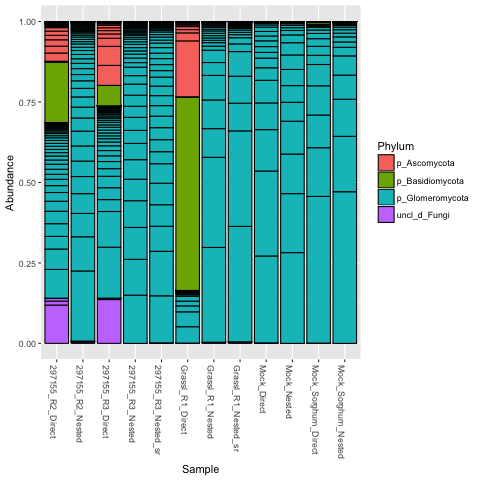

In [15]:
%%R
#transform to relative abundance
ps.snorm = transform_sample_counts(ps, function(x) x/sum(x))
sample_data(ps.snorm)$Sample = factor(sample_data(ps.snorm)$Sample, levels = sample_data(ps.snorm)$Sample)
plot_bar(ps.snorm, fill = "Phylum", x = "Sample")

## how many AMF reads are left?

In [58]:
%%R
cbind(SSall,SSamf)

                    SSall SSamf
Mock_Direct          1337  1330
Mock_Sorghum_Direct  1222  1211
Mock_Nested           578   578
Mock_Sorghum_Nested  1388  1388
Grassl_R1_Direct     1082   177
Grassl_R1_Nested      550   548
Grassl_R1_Nested_sr   418   416
297155_R2_Direct     1218   665
297155_R2_Nested      978   971
297155_R3_Direct      676   404
297155_R3_Nested      494   494
297155_R3_Nested_sr   643   640


In [42]:
%%R
paste("Average read depth: ", mean(SSall))


[1] "Average read depth:  882"


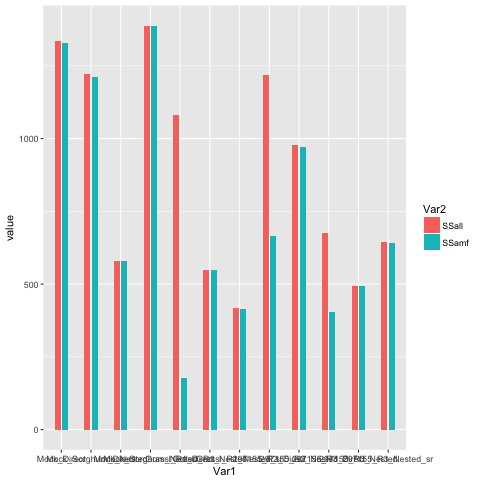

In [40]:
%%R
cbind(SSall,SSamf) %>% 
    melt() %>%
    ggplot(., aes(x = Var1, y = value))+
      geom_bar(aes(fill = Var2),width = 0.4, position = position_dodge(width=0.5), stat="identity")

In [43]:
%%R
paste("Minimum AMF reads in direct: ", min(SSamf))


[1] "Minimum AMF reads in direct:  177"


# What is the composition of glomeromycota?

In [44]:
%%R
psAMF.count = ps %>% 
    subset_taxa(Phylum == "p_Glomeromycota")
psAMF.count

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 73 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 73 taxa by 7 taxonomic ranks ]


In [20]:
%%R
SSamf = sample_sums(psAMF.count)
SSamf

        Mock_Direct Mock_Sorghum_Direct         Mock_Nested Mock_Sorghum_Nested 
               1330                1211                 578                1388 
   Grassl_R1_Direct    Grassl_R1_Nested Grassl_R1_Nested_sr    297155_R2_Direct 
                177                 548                 416                 665 
   297155_R2_Nested    297155_R3_Direct    297155_R3_Nested 297155_R3_Nested_sr 
                971                 404                 494                 640 


In [47]:
%%R
psAMF = ps %>% 
    subset_taxa(Phylum == "p_Glomeromycota") %>%
    transform_sample_counts(., function(x) x/sum(x))
psAMF

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 73 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 73 taxa by 7 taxonomic ranks ]


## Mock controls

In [59]:
%%R
library(RColorBrewer)
cs = brewer.pal(10,"Set3")

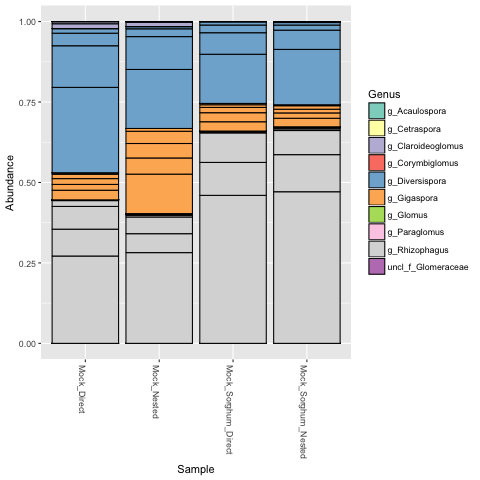

In [60]:
%%R
psAMF %>%
    subset_samples(Barcode %in% c(1,2,4,5)) %>%
plot_bar(fill = "Genus" )+
scale_fill_manual(values = cs)

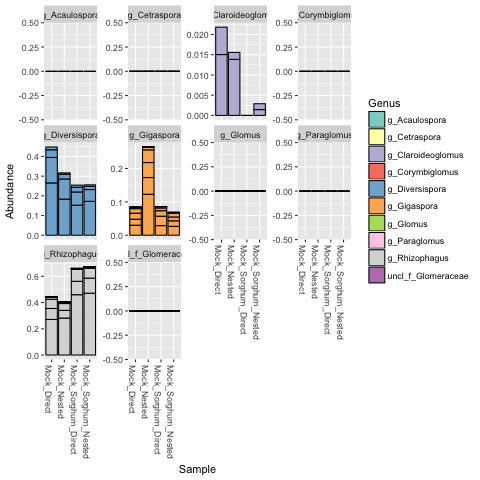

In [69]:
%%R
psAMF %>%
    subset_samples(Barcode %in% c(1,2,4,5)) %>%
plot_bar(fill = "Genus")+
    scale_fill_manual(values = cs)+
    facet_wrap(~Genus, scales = "free_y")

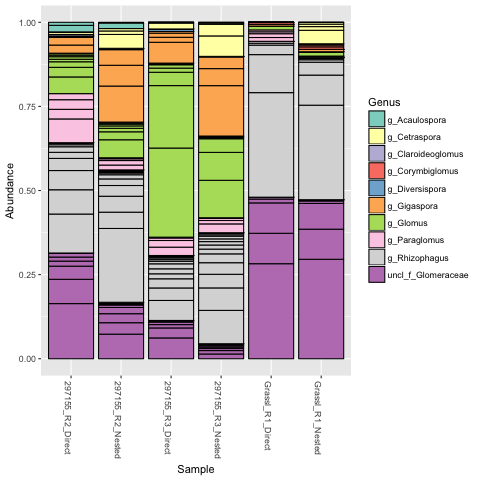

In [61]:
%%R

psAMF %>%
    subset_samples(Barcode %in% c(6,7,9,10,11,12)) %>%
plot_bar(fill = "Genus")+
    scale_fill_manual(values = cs)

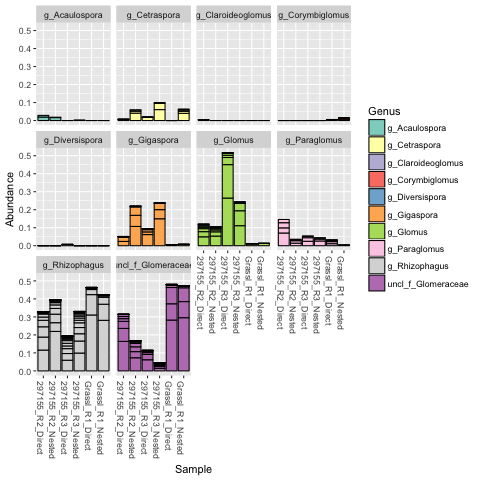

In [66]:
%%R
psAMF %>%
    subset_samples(Barcode %in% c(6,7,9,10,11,12)) %>%
plot_bar(fill = "Genus")+
    scale_fill_manual(values = cs)+
    facet_wrap(~Genus)

# What is the reproducibility of field samples between single and triplicate reactions

In [51]:
%%R
AMFm = psmelt(psAMF)

In [52]:
%%R
head(AMFm)

       OTU              Sample Abundance Barcode       sample_Sample
284  OTU_2 Mock_Sorghum_Nested 0.4711816       5 Mock_Sorghum_Nested
281  OTU_2 Mock_Sorghum_Direct 0.4599505       2 Mock_Sorghum_Direct
614  OTU_5 Grassl_R1_Nested_sr 0.3605769       8 Grassl_R1_Nested_sr
617  OTU_5    Grassl_R1_Direct 0.3107345       6    Grassl_R1_Direct
383 OTU_25 Grassl_R1_Nested_sr 0.2980769       8 Grassl_R1_Nested_sr
384 OTU_25    Grassl_R1_Nested 0.2956204       7    Grassl_R1_Nested
          Source Amplification Reactions  Domain          Phylum
284 Mock_Sorghum        Nested         3 d_Fungi p_Glomeromycota
281 Mock_Sorghum        Direct         3 d_Fungi p_Glomeromycota
614    Grassl_R1        Nested         1 d_Fungi p_Glomeromycota
617    Grassl_R1        Direct         3 d_Fungi p_Glomeromycota
383    Grassl_R1        Nested         1 d_Fungi p_Glomeromycota
384    Grassl_R1        Nested         3 d_Fungi p_Glomeromycota
               Class        Order        Family              G

In [53]:
%%R
tmp = AMFm %>% 
    filter(Barcode %in% c(7,8,12,13)) %>%
    select(Source, OTU, Reactions, Abundance) %>%
    spread(key = Reactions, value = Abundance) 

colnames(tmp)[3:4] = c("Single", "Triplicate")  
head(tmp)
    

     Source     OTU    Single  Triplicate
1 297155_R3  OTU_10 0.0046875 0.008097166
2 297155_R3 OTU_103 0.0000000 0.000000000
3 297155_R3 OTU_104 0.0093750 0.002024291
4 297155_R3 OTU_105 0.0031250 0.000000000
5 297155_R3  OTU_11 0.0187500 0.012145749
6 297155_R3 OTU_110 0.0000000 0.000000000


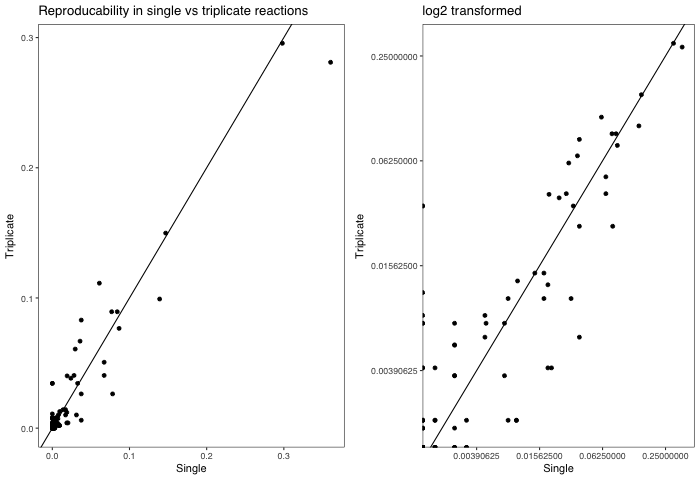

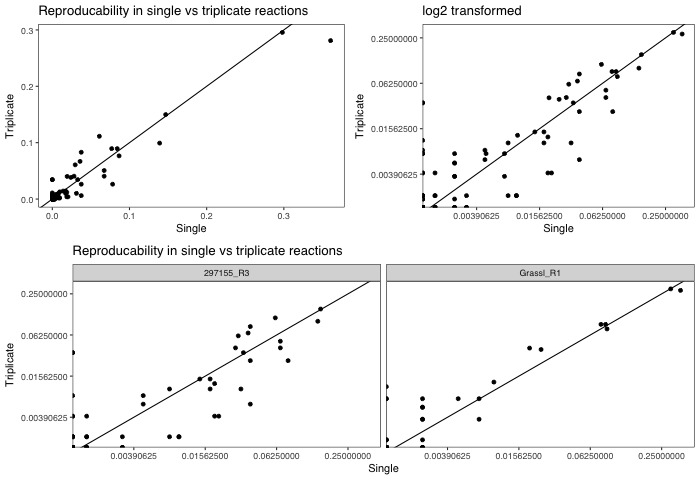

In [54]:
%%R -w 700
p1 = ggplot(tmp, aes(x = Single, y = Triplicate)) +
    geom_point()+
    ggtitle("Reproducability in single vs triplicate reactions")+
    geom_abline(slope = 1, intercept = 0)+
    #scale_x_continuous(trans='log2')+
    #scale_y_continuous(trans='log2')+
theme_pub()

p2 = ggplot(tmp, aes(x = Single, y = Triplicate)) +
    geom_point()+
    ggtitle("log2 transformed")+
    geom_abline(slope = 1, intercept = 0)+
    scale_x_continuous(trans='log2')+
    scale_y_continuous(trans='log2')+
theme_pub()

p3 = ggplot(tmp, aes(x = Single, y = Triplicate)) +
    geom_point()+
    ggtitle("Reproducability in single vs triplicate reactions")+
    geom_abline(slope = 1, intercept = 0)+
    facet_wrap(~Source)+
    scale_x_continuous(trans='log2')+
    scale_y_continuous(trans='log2')+
theme_pub()

#p3


gA = grid.arrange(p1,p2, ncol = 2)
gB = grid.arrange(gA,p3, ncol = 1)

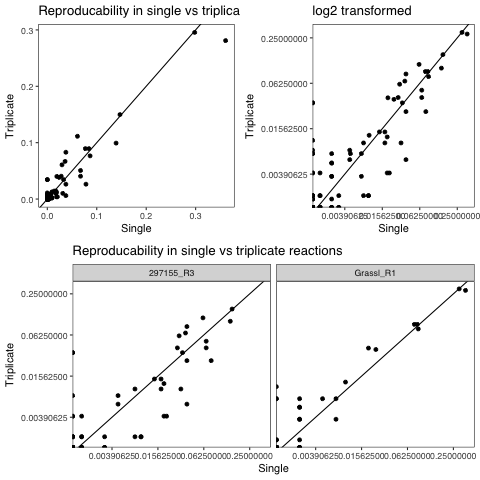

In [55]:
%%R
grid.arrange(gB)

In [56]:
%%R
m1 = lm(log2(Triplicate+0.001)~log2(Single+0.001), data = tmp)
summary(m1)


Call:
lm(formula = log2(Triplicate + 0.001) ~ log2(Single + 0.001), 
    data = tmp)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0950 -0.3301 -0.3301  0.4181  4.8161 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.03263    0.36563  -2.824  0.00541 ** 
log2(Single + 0.001)  0.86325    0.04156  20.773  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.107 on 144 degrees of freedom
Multiple R-squared:  0.7498,	Adjusted R-squared:  0.7481 
F-statistic: 431.5 on 1 and 144 DF,  p-value: < 2.2e-16



# Do the nested vs direct amplifcation bias against particular taxa

In [72]:
%%R
tmp = AMFm %>% 
    filter(Barcode %in% c(1,2,4,5,6,7, 9,10,11,12)) %>%
    select(Source, OTU, Family, Genus, Amplification, Abundance) %>%
    spread(key = Amplification, value = Abundance) 
head(tmp)

     Source     OTU            Family              Genus      Direct
1 297155_R2  OTU_10     f_Glomeraceae      g_Rhizophagus 0.036090226
2 297155_R2 OTU_103     f_Glomeraceae      g_Rhizophagus 0.000000000
3 297155_R2 OTU_104 f_Paraglomeraceae       g_Paraglomus 0.028571429
4 297155_R2 OTU_105     f_Glomeraceae uncl_f_Glomeraceae 0.000000000
5 297155_R2  OTU_11     f_Glomeraceae      g_Rhizophagus 0.016541353
6 297155_R2 OTU_110     f_Glomeraceae      g_Rhizophagus 0.006015038
       Nested
1 0.047373841
2 0.000000000
3 0.003089598
4 0.000000000
5 0.048403708
6 0.005149331


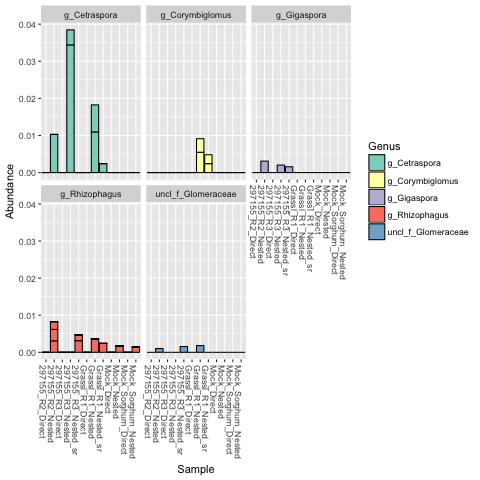

In [82]:
%%R
NestedOTUs = tmp %>% 
    group_by(OTU, Family, Genus) %>%
    summarize(minDirect = min(Direct),
              maxDirect = max(Direct),
              minNested = min(Nested),
              maxNested = max(Nested)) %>%
              filter(maxDirect == 0 & maxNested > 0) %>%
                .$OTU %>%
                as.character()
psAMF %>%
    prune_taxa(NestedOTUs, .) %>%
plot_bar(fill = "Genus")+
    scale_fill_manual(values = cs)+
    facet_wrap(~Genus)

    

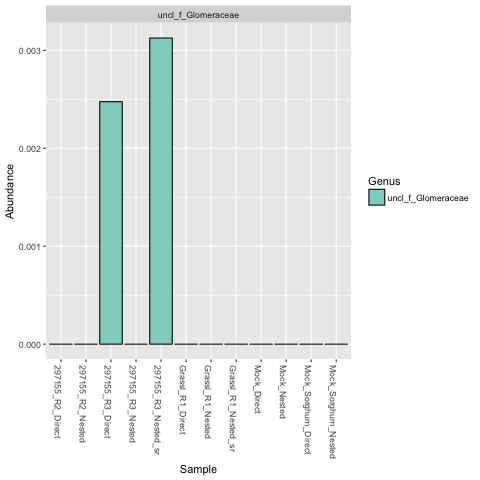

In [88]:
%%R
DirectOTUs = tmp %>% 
    group_by(OTU, Family, Genus) %>%
    summarize(minDirect = min(Direct),
              maxDirect = max(Direct),
              minNested = min(Nested),
              maxNested = max(Nested)) %>%
              filter(maxDirect > 0 & maxNested == 0) %>%
                .$OTU %>%
                as.character()
psAMF %>%
    prune_taxa(DirectOTUs, .) %>%
plot_bar(fill = "Genus")+
    scale_fill_manual(values = cs)+
    facet_wrap(~Genus)

In [77]:
%%R
tmp %>% 
    group_by(OTU, Family, Genus) %>%
    summarize(minDirect = min(Direct),
              maxDirect = max(Direct),
              minNested = min(Nested),
              maxNested = max(Nested)) %>%
              filter(maxNested == 0 & maxDirect > 0)

# A tibble: 1 x 7
# Groups: OTU, Family [1]
  OTU     Family        Genus              minDirect maxDirect minNested maxNe…
  <chr>   <fctr>        <fctr>                 <dbl>     <dbl>     <dbl>  <dbl>
1 OTU_105 f_Glomeraceae uncl_f_Glomeraceae         0   0.00248         0      0


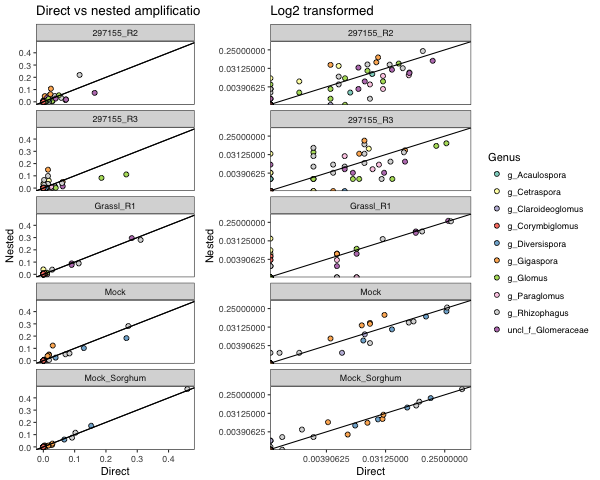

In [197]:
%%R -w 600
p1 = ggplot(tmp, aes(x = Direct, y = Nested)) +
    geom_point(aes(fill = Genus), pch = 21, size = 2)+
    #scale_x_continuous(trans='log2')+
    #scale_y_continuous(trans='log2')+
    ggtitle("Direct vs nested amplification")+
    geom_abline(intercept = 0, slope = 1)+
    geom_abline(intercept = 0, slope = 1)+
    facet_wrap(~Source, ncol =1)+
    theme_pub()+
    scale_fill_manual(values = cs)+
    theme(legend.position = "none")

p2 = ggplot(tmp, aes(x = Direct, y = Nested)) +
    geom_point(aes(fill = Genus), pch = 21, size = 2)+
    ggtitle("Log2 transformed")+
    scale_x_continuous(trans='log2')+
    scale_y_continuous(trans='log2')+
    geom_abline(intercept = 0, slope = 1)+
    scale_fill_manual(values = cs)+
    facet_wrap(~Source, ncol =1)+
    theme_pub()+
    theme(legend.position = "right")

grid.arrange(p1,p2, ncol = 2, widths = c(1,2))

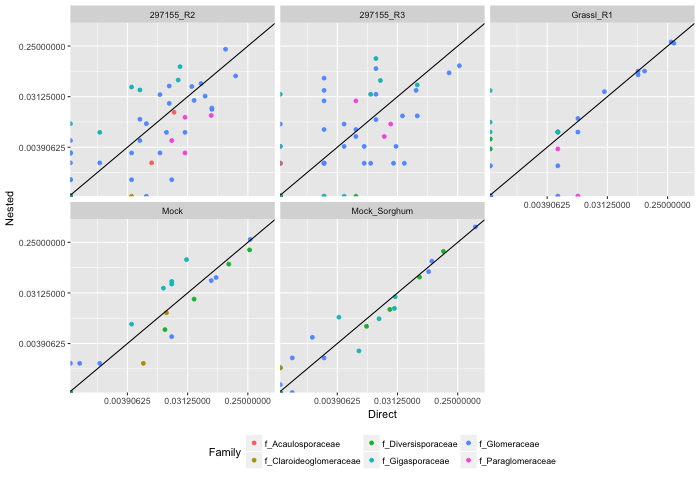

In [145]:
%%R -w 700
ggplot(tmp, aes(x = Direct, y = Nested)) +
    geom_point(aes(color = Family))+
    scale_x_continuous(trans='log2')+
    scale_y_continuous(trans='log2')+
    geom_abline(intercept = 0, slope = 1)+
    facet_wrap(~Source)+
    theme(legend.position = "bottom")